In [1]:
!pip install plotly-express


# Installing the Libraries for EDA

In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Loading and Cleaning Data

In [3]:
df = pd.read_csv('Population-by-state.csv')

In [4]:
df.shape

(53, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO.id             53 non-null     object
 1   GEO.id2            53 non-null     object
 2   GEO.display-label  53 non-null     object
 3   rescen42010        53 non-null     object
 4   resbase42010       53 non-null     object
 5   respop72010        53 non-null     object
 6   respop72011        53 non-null     object
 7   respop72012        53 non-null     object
 8   respop72013        53 non-null     object
 9   respop72014        53 non-null     object
 10  respop72015        53 non-null     object
 11  respop72016        53 non-null     object
dtypes: object(12)
memory usage: 5.1+ KB


In [6]:
df.describe()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
count,53,53,53,53,53,53,53,53,53,53,53,53
unique,53,53,53,53,53,53,53,53,53,53,53,53
top,0400000US18,33,Kansas,2700551,12831574,18849098,3589893,4720760,4767894,2992400,1330111,3134693
freq,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
df.head(15)

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016
1,0400000US01,1,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300
2,0400000US02,2,Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894
3,0400000US04,4,Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071
4,0400000US05,5,Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248
5,0400000US06,6,California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017
6,0400000US08,8,Colorado,5029196,5029324,5048644,5118360,5189867,5267603,5349648,5448819,5540545
7,0400000US09,9,Connecticut,3574097,3574114,3579899,3589893,3593795,3596003,3591873,3584730,3576452
8,0400000US10,10,Delaware,897934,897936,899816,907924,916993,925395,934948,944076,952065
9,0400000US11,11,District of Columbia,601723,601766,605183,620477,635327,649165,659005,670377,681170


In [8]:
"""Clean population dataset"""
pop_by_state = df.copy()
pop_by_state.columns = pop_by_state.iloc[0]
pop_by_state.drop(0,axis=0, inplace=True)
pop_by_state.drop(['Id', 'Id2','April 1, 2010 - Census', 'April 1, 2010 - Estimates Base'], axis=1, inplace=True)
pop_by_state.columns = ['State','pop2010','pop2011','pop2012','pop2013','pop2014','pop2015','pop2016']

In [9]:
pop_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    52 non-null     object
 1   pop2010  52 non-null     object
 2   pop2011  52 non-null     object
 3   pop2012  52 non-null     object
 4   pop2013  52 non-null     object
 5   pop2014  52 non-null     object
 6   pop2015  52 non-null     object
 7   pop2016  52 non-null     object
dtypes: object(8)
memory usage: 3.7+ KB


In [10]:
pop_by_state['State'] = pop_by_state['State'].astype(str).astype(str)
pop_by_state['pop2010'] = pop_by_state['pop2010'].astype(str).astype(int)
pop_by_state['pop2011'] = pop_by_state['pop2011'].astype(str).astype(int)
pop_by_state['pop2012'] = pop_by_state['pop2012'].astype(str).astype(int)
pop_by_state['pop2013'] = pop_by_state['pop2013'].astype(str).astype(int)
pop_by_state['pop2014'] = pop_by_state['pop2014'].astype(str).astype(int)
pop_by_state['pop2015'] = pop_by_state['pop2015'].astype(str).astype(int)
pop_by_state['pop2016'] = pop_by_state['pop2016'].astype(str).astype(int)

In [11]:
pop_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    52 non-null     object
 1   pop2010  52 non-null     int64 
 2   pop2011  52 non-null     int64 
 3   pop2012  52 non-null     int64 
 4   pop2013  52 non-null     int64 
 5   pop2014  52 non-null     int64 
 6   pop2015  52 non-null     int64 
 7   pop2016  52 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.7+ KB


In [12]:
pop_by_state.head()

,State,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016
1,Alabama,4785492,4799918,4815960,4829479,4843214,4853875,4863300
2,Alaska,714031,722713,731089,736879,736705,737709,741894
3,Arizona,6408312,6467163,6549634,6624617,6719993,6817565,6931071
4,Arkansas,2921995,2939493,2950685,2958663,2966912,2977853,2988248
5,California,37332685,37676861,38011074,38335203,38680810,38993940,39250017


In [15]:
pop_by_state[['State','pop2016']].head()

,State,pop2016
1,Alabama,4863300
2,Alaska,741894
3,Arizona,6931071
4,Arkansas,2988248
5,California,39250017


In [16]:
pop_by_state_2016 = pop_by_state[['State','pop2016']]

In [17]:
pop_by_state_2016.head()

,State,pop2016
1,Alabama,4863300
2,Alaska,741894
3,Arizona,6931071
4,Arkansas,2988248
5,California,39250017


# Histogram of Population in US

In [26]:
px.histogram(pop_by_state_2016 ,x = 'pop2016',color_discrete_sequence = ['darkred'])

# Population of Mean, Median and Outlier

In [239]:
px.box(pop_by_state_2016 ,x = 'pop2016',color_discrete_sequence = ['darkred'],points="all")


In [37]:
pop_by_state_2016['Percent'] = [round(i*100/sum(pop_by_state_2016['pop2016']),1) for i in pop_by_state_2016['pop2016']]
pop_by_state_2016

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,pop2016,Percent
1,Alabama,4863300,1.5
2,Alaska,741894,0.2
3,Arizona,6931071,2.1
4,Arkansas,2988248,0.9
5,California,39250017,12.0
6,Colorado,5540545,1.7
7,Connecticut,3576452,1.1
8,Delaware,952065,0.3
9,District of Columbia,681170,0.2
10,Florida,20612439,6.3


In [126]:
# !pip install circlify

In [123]:
# import circlify
# # compute circle positions:
# circles = circlify.circlify(pop_by_state_2016['Percent'].tolist(), 
#                             show_enclosure=False, 
#                             target_enclosure=circlify.Circle(x=0, y=0)
#                            )
# circles.sort()

In [125]:
# #create a laebls list for each bubble 
# label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(pop_by_state_2016['State'],
#                                                             pop_by_state_2016['Percent'],
#                                                             pop_by_state_2016['pop2016'])]
# fig, ax = plt.subplots(figsize=(14,14), facecolor='white')
# ax.axis('off')
# lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
# plt.xlim(-lim, lim)
# plt.ylim(-lim, lim)

# # print circles
# for circle, note, color in zip(circles, label, pal_):
#     x, y, r = circle
#     ax.add_patch(plt.Circle((x, y), r, alpha=1, color = color))
#     plt.annotate(note.replace('<br>','\n'), (x,y), size=16, va='center', ha='center')
# plt.xticks([])
# plt.yticks([])
# plt.show()

# Percentange of Population across the US

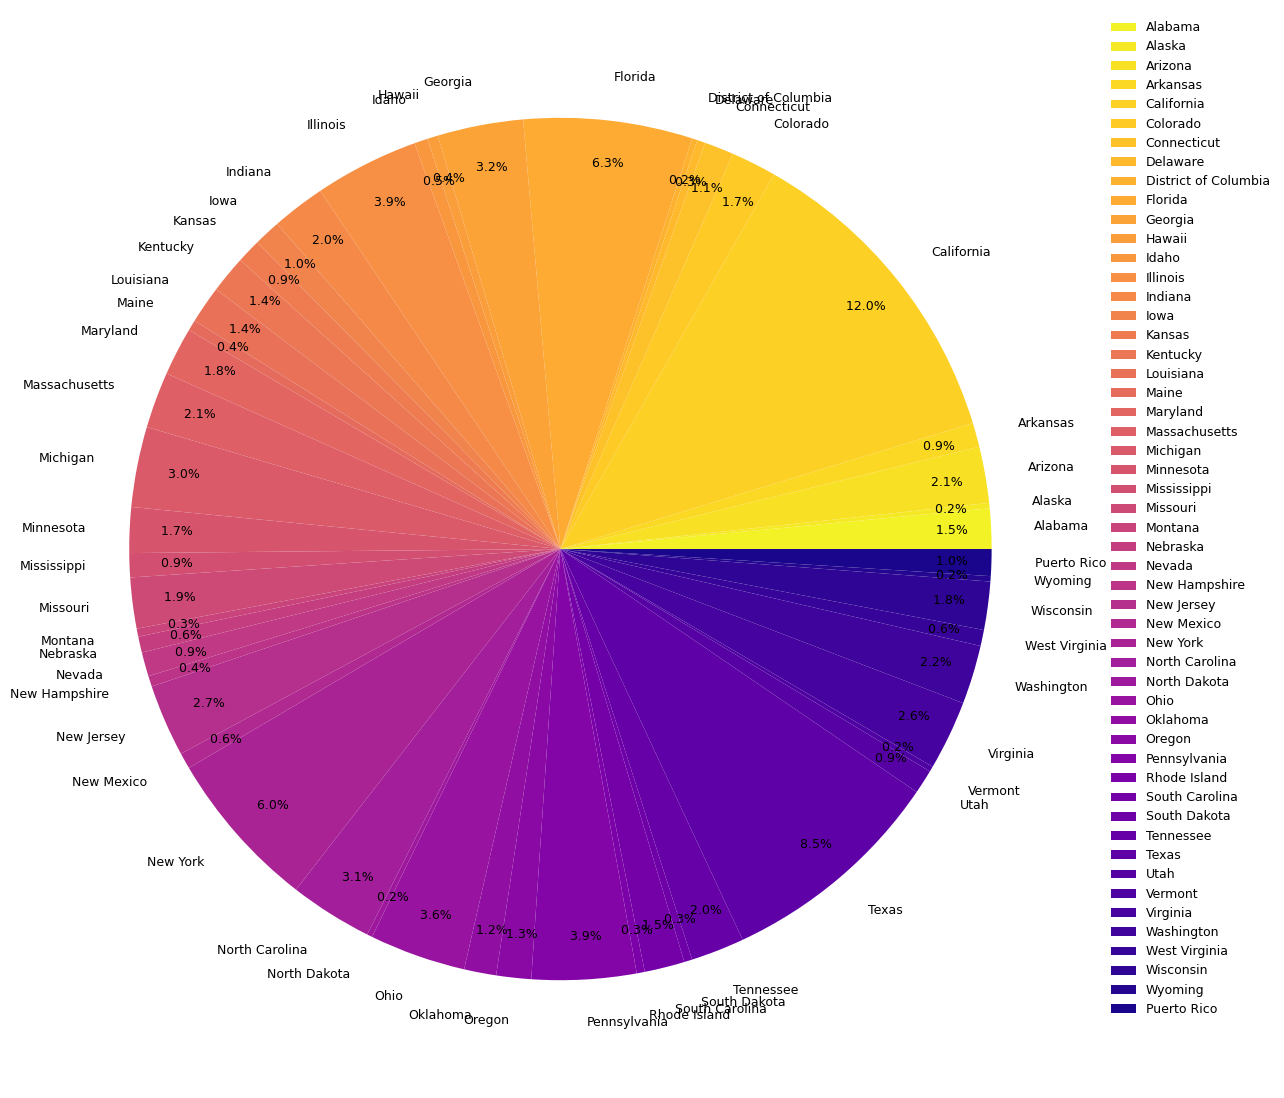

In [45]:
#get a color list, palette name can be changed
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(pop_by_state_2016['State'])).as_hex())
#plot a pie chart
plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 9})
plt.pie(pop_by_state_2016['Percent'],
        labels= pop_by_state_2016['State'],
        colors=pal_, autopct='%5.01f%%',
        pctdistance=.9)
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.show()

# Loading and Cleaning Homelessness Data

In [82]:
df1 = pd.read_csv('2007-2016-Homelessnewss-USA.csv')

In [83]:
df1.shape

(86529, 6)

In [84]:
df1.describe()

,Year,State,CoC Number,CoC Name,Measures,Count
count,86529,86529,86529,86529,86529,86529
unique,10,54,414,414,42,3608
top,1/1/2015,CA,MI-517,Chattanooga/Southeast Tennessee CoC,Sheltered Homeless Individuals,0
freq,16926,8946,216,216,3999,12209


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [86]:
df1['Count'] = df1['Count'].str.replace(',', '').astype(np.int64)
df1['Measures'] = df1['Measures'].str.replace(',', '').astype(str)
"""Clean homelss dataset"""
homeless_pop = df1.copy()
#homeless_pop['Count'] = homeless_pop['Count'].str.replace(',', '').astype(np.int64) #turn count number into int
homeless_pop.drop(['CoC Number','CoC Name'], axis=1, inplace=True)
homeless_pop['Year'] = pd.to_datetime(homeless_pop['Year'])
homeless_pop['Year'] = homeless_pop['Year'].dt.year
homeless_pop.head()

,Year,State,Measures,Count
0,2007,AK,Chronically Homeless Individuals,224
1,2007,AK,Homeless Individuals,696
2,2007,AK,Homeless People in Families,278
3,2007,AK,Sheltered Chronically Homeless Individuals,187
4,2007,AK,Sheltered Homeless,842


In [96]:
homeless_pop.tail()

,Year,State,Measures,Count
86524,2016,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,2016,WY,Unsheltered Homeless Veterans,31
86526,2016,WY,Unsheltered Parenting Youth (Under 25),3
86527,2016,WY,Unsheltered Parenting Youth Age 18-24,3
86528,2016,WY,Unsheltered Parenting Youth Under 18,0


In [98]:
homeless_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      86529 non-null  int64 
 1   State     86529 non-null  object
 2   Measures  86529 non-null  object
 3   Count     86529 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [99]:
homeless_pop['Year'] = pd.to_datetime(homeless_pop['Year'], format='%Y')

In [130]:
homeless_pop.query("Year == 2016")

,Year,State,Measures,Count
69645,2016-01-01,AK,Children of Parenting Youth,6
69646,2016-01-01,AK,Chronically Homeless,50
69647,2016-01-01,AK,Chronically Homeless Individuals,48
69648,2016-01-01,AK,Chronically Homeless People in Families,2
69649,2016-01-01,AK,Homeless Individuals,905
...,...,...,...,...
86524,2016-01-01,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,2016-01-01,WY,Unsheltered Homeless Veterans,31
86526,2016-01-01,WY,Unsheltered Parenting Youth (Under 25),3
86527,2016-01-01,WY,Unsheltered Parenting Youth Age 18-24,3


In [100]:
homeless_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      86529 non-null  datetime64[ns]
 1   State     86529 non-null  object        
 2   Measures  86529 non-null  object        
 3   Count     86529 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.6+ MB


In [132]:
Data_Homelessness = homeless_pop.query("Year == 2016")

In [155]:
Data_Homelessness

,Year,State,Measures,Count
69645,2016-01-01,AK,Children of Parenting Youth,6
69646,2016-01-01,AK,Chronically Homeless,50
69647,2016-01-01,AK,Chronically Homeless Individuals,48
69648,2016-01-01,AK,Chronically Homeless People in Families,2
69649,2016-01-01,AK,Homeless Individuals,905
...,...,...,...,...
86524,2016-01-01,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,2016-01-01,WY,Unsheltered Homeless Veterans,31
86526,2016-01-01,WY,Unsheltered Parenting Youth (Under 25),3
86527,2016-01-01,WY,Unsheltered Parenting Youth Age 18-24,3


In [145]:
Total_Count_For_Each_State = Data_Homelessness.query("Measures == 'Total Homeless'").groupby('State').sum()

In [146]:
Total_Count = Total_Count_For_Each_State.sum()

In [166]:
Percentage_Of_Total = (Total_Count_For_Each_State/Total_Count)*100

In [167]:
Percentage_Of_Total.columns

Index(['Count'], dtype='object')

In [172]:
 #Percentage_Of_Total.rename(column=['Percentage':'Count'])
Percentage_Of_Total.rename(columns = {'Count':'Percentage'}, inplace = True)

In [173]:
Percentage_Of_Total

,Percentage
State,
AK,0.352773
AL,0.747552
AR,0.447877
AZ,1.765140
CA,21.483176
CO,1.918433
CT,0.709547
DC,1.518381
DE,0.194571


In [174]:
Percentage_Of_Total.reset_index(inplace=True)
Percentage_Of_Total = Percentage_Of_Total.rename(columns = {'index':'State'})

In [175]:
Percentage_Of_Total

,State,Percentage
0,AK,0.352773
1,AL,0.747552
2,AR,0.447877
3,AZ,1.765140
4,CA,21.483176
5,CO,1.918433
6,CT,0.709547
7,DC,1.518381
8,DE,0.194571
9,FL,6.102435


# Visional of Homelessness across the US

In [178]:

import plotly.express as px

fig = px.choropleth(Percentage_Of_Total, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='Percentage',
                    hover_name='Percentage',
                    color_continuous_scale=["gold", "blue"],
                    title='Percentage of Homelessness per State (2016)', 
                    scope='usa')
fig.show()

In [189]:
Total_Count

Count    549928
dtype: int64

# Total of Unsheltered Homelessness  percentage 

In [188]:
Total_Unsheltered = Data_Homelessness[Data_Homelessness['Measures'].str.contains('Unsheltered')].groupby('Measures').sum()

In [190]:
Total_Percentage_Unsheltered = (Total_Unsheltered/Total_Count)* 100

In [191]:
Total_Percentage_Unsheltered

,Count
Measures,
Unsheltered Children of Parenting Youth,0.120379
Unsheltered Chronically Homeless,10.187515
Unsheltered Chronically Homeless Individuals,9.617623
Unsheltered Chronically Homeless People in Families,0.569893
Unsheltered Homeless,32.069107
Unsheltered Homeless Individuals,28.586288
Unsheltered Homeless People in Families,3.482820
Unsheltered Homeless Unaccompanied Children (Under 18),0.292038
Unsheltered Homeless Unaccompanied Young Adults (Age 18-24),2.707991


In [193]:
Total_Percentage_Unsheltered.reset_index(inplace=True)
Total_Percentage_Unsheltered = Total_Percentage_Unsheltered.rename(columns = {'index':'Measures'})

In [194]:
Total_Percentage_Unsheltered

,Measures,Count
0,Unsheltered Children of Parenting Youth,0.120379
1,Unsheltered Chronically Homeless,10.187515
2,Unsheltered Chronically Homeless Individuals,9.617623
3,Unsheltered Chronically Homeless People in Fam...,0.569893
4,Unsheltered Homeless,32.069107
5,Unsheltered Homeless Individuals,28.586288
6,Unsheltered Homeless People in Families,3.482820
7,Unsheltered Homeless Unaccompanied Children (U...,0.292038
8,Unsheltered Homeless Unaccompanied Young Adult...,2.707991
9,Unsheltered Homeless Unaccompanied Youth (Unde...,3.000029


In [195]:
Total_Percentage_Unsheltered.rename(columns = {'Count':'Percentage'}, inplace = True)

In [209]:
import plotly.express as px

fig = px.pie(Total_Percentage_Unsheltered, values='Percentage', names='Measures')
fig.show()

#  Total of Sheltered Homelessness  percentage 

In [200]:
Total_Sheltered = Data_Homelessness[Data_Homelessness['Measures'].str.contains('Sheltered')].groupby('Measures').sum()

In [202]:
Total_Percentage_Sheltered = (Total_Sheltered/Total_Count)* 100

In [203]:
Total_Percentage_Sheltered.reset_index(inplace=True)

In [204]:
Total_Percentage_Sheltered.rename(columns = {'Count':'Percentage'}, inplace = True)
Total_Percentage_Sheltered = Total_Percentage_Sheltered.rename(columns = {'index':'Measures'})

In [210]:
import plotly.express as px

fig = px.pie(Total_Percentage_Sheltered, values='Percentage', names='Measures')
fig.show()

# Other description of Homelessness

In [212]:
Other_Than_Sheltered = Data_Homelessness[~Data_Homelessness['Measures'].str.contains('Sheltered')].groupby('Measures').sum()

In [215]:
Other_Than_Sheltered.reset_index(inplace=True)

In [220]:
Other_Than_Sheltered.rename(columns = {'Count':'Percentage'}, inplace = True)
Other_Than_Sheltered  = Other_Than_Sheltered .rename(columns = {'index':'Measures'})

In [221]:
Other_Than_Sheltered 

,Measures,Percentage
0,Children of Parenting Youth,13318
1,Chronically Homeless,86132
2,Chronically Homeless Individuals,77486
3,Chronically Homeless People in Families,8646
4,Homeless Individuals,355212
5,Homeless People in Families,194716
6,Homeless Unaccompanied Children (Under 18),3824
7,Homeless Unaccompanied Young Adults (Age 18-24),31862
8,Homeless Unaccompanied Youth (Under 25),35686
9,Homeless Veterans,39471


In [222]:
Other_Than_Sheltered_UnSheltered = Other_Than_Sheltered[~Other_Than_Sheltered['Measures'].str.contains('Unsheltered')].groupby('Measures').sum()

In [225]:
Other_Than_Sheltered_UnSheltered = Other_Than_Sheltered[~Other_Than_Sheltered['Measures'].str.contains('Unsheltered')].groupby('Measures').sum()

,Percentage
Measures,
Children of Parenting Youth,13318
Chronically Homeless,86132
Chronically Homeless Individuals,77486
Chronically Homeless People in Families,8646
Homeless Individuals,355212
Homeless People in Families,194716
Homeless Unaccompanied Children (Under 18),3824
Homeless Unaccompanied Young Adults (Age 18-24),31862
Homeless Unaccompanied Youth (Under 25),35686


In [235]:
#Other_Than_Sheltered_UnSheltered
Other_Than_Sheltered_UnSheltered_no_homeless = Other_Than_Sheltered_UnSheltered[~Other_Than_Sheltered_UnSheltered['Measures'].str.contains('Total Homeless')].groupby('Measures').sum()

In [236]:
Other_Than_Sheltered_UnSheltered_no_homeless.reset_index(inplace=True)

In [237]:
Other_Than_Sheltered_UnSheltered_no_homeless.rename(columns = {'Count':'Percentage'}, inplace = True)
Other_Than_Sheltered_UnSheltered_no_homeless  = Other_Than_Sheltered_UnSheltered_no_homeless.rename(columns = {'index':'Measures'})

In [238]:
import plotly.express as px

fig = px.pie(Other_Than_Sheltered_UnSheltered_no_homeless, values='Percentage', names='Measures')
fig.show()

In [240]:
Data_Homelessness

,Year,State,Measures,Count
69645,2016-01-01,AK,Children of Parenting Youth,6
69646,2016-01-01,AK,Chronically Homeless,50
69647,2016-01-01,AK,Chronically Homeless Individuals,48
69648,2016-01-01,AK,Chronically Homeless People in Families,2
69649,2016-01-01,AK,Homeless Individuals,905
...,...,...,...,...
86524,2016-01-01,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,2016-01-01,WY,Unsheltered Homeless Veterans,31
86526,2016-01-01,WY,Unsheltered Parenting Youth (Under 25),3
86527,2016-01-01,WY,Unsheltered Parenting Youth Age 18-24,3


In [265]:
#Data_Homelessness.groupby('Measures').rank()
Data_Homelessness.query("Measures=='Chronically Homeless People in Families'").groupby(["State"])["Count"].sum().reset_index()

,State,Count
0,AK,10
1,AL,30
2,AR,86
3,AZ,68
4,CA,1746
5,CO,187
6,CT,28
7,DC,96
8,DE,9
9,FL,480


In [249]:
Data_Homelessness[Data_Homelessness['Measures'].str.contains('Sheltered')].groupby('State').sum()

,Count
State,
AK,3598
AL,6886
AR,4116
AZ,15909
CA,99971
CO,19245
CT,7601
DC,21198
DE,2417
